In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('BTC-USDp.csv')

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df.set_index('Date', inplace=True)

data = df[['Close']]


## SCALING

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


## 

## CREATING LAG FEATURES

In [ ]:
prediction_days = 60

# Prepare the training data
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


## TRAINING MODEL

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history=model.fit(x_train, y_train, epochs=25, batch_size=32)


## TEST MODEL ON DAYS SINCE THE START OF THE YEAR

In [ ]:
test_start = pd.to_datetime('2024-01-01')
test_data = df[df.index >= test_start]
total_data = pd.concat((df['Close'], test_data['Close']), axis=0)


In [ ]:
model_inputs = total_data[len(total_data) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


In [ ]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


In [ ]:
true_prices = test_data['Close'].values
comparison_df = pd.DataFrame({
    'Date': test_data.index,
    'True_Price': true_prices,
    'Predicted_Price': predicted_prices.flatten()
})

C:\Users\sadam\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0141
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0026
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - loss: 0.0021
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0018
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0017
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.0017
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0022
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0017
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.0018
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0013
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.0013
Epoch 12/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0014
Epoch 13/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0014
Epoch 14/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - loss: 0.0012
Epoch 15/25
110/110 

c:\Users\sadam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step


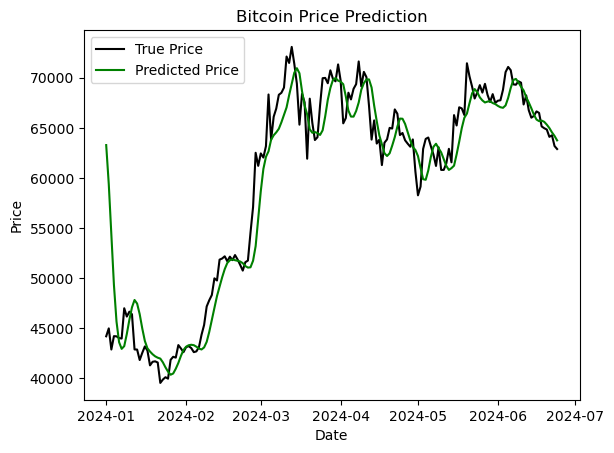

In [ ]:
plt.plot(test_data.index, true_prices, color='black', label='True Price')
plt.plot(test_data.index, predicted_prices, color='green', label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
comparison_df

,Date,True_Price,Predicted_Price
0,2024-01-01,44167.332031,64497.703125
1,2024-01-02,44957.968750,60529.957031
2,2024-01-03,42848.175781,55194.781250
3,2024-01-04,44179.921875,49986.699219
4,2024-01-05,44162.691406,46249.980469
...,...,...,...
171,2024-06-20,64828.656250,66664.937500
172,2024-06-21,64096.199219,66254.078125
173,2024-06-22,64252.578125,65761.703125
174,2024-06-23,63180.796875,65372.621094


## CALCULATING MAE OR THE AVERAGE LOSS/GAIN

In [ ]:
sum(comparison_df.Predicted_Price-comparison_df.True_Price)/len(comparison_df)

844.7844236562488